In [29]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()


In [30]:
df_X=diabetes.data
df_y=diabetes.target

In [31]:
type(df_X)

numpy.ndarray

In [32]:
type(df_y)

numpy.ndarray

In [33]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, test_size=0.33, random_state=321)

In [35]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [36]:
print('<x_data[0]> : ',df_X[0])
print()
print('<y_data[0]> : ',df_y[0] )

<x_data[0]> :  [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]

<y_data[0]> :  151.0


In [37]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [38]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [39]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [40]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [41]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [44]:
LEARNING_RATE = 0.001

In [46]:
losses = []

for i in range(1, 300001):
    dW, db = gradient(X_train, W, b, Y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, Y_train)
    losses.append(L)
    if i % 100000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100000 : Loss 2885.0988
Iteration 200000 : Loss 2882.0895
Iteration 300000 : Loss 2880.4971


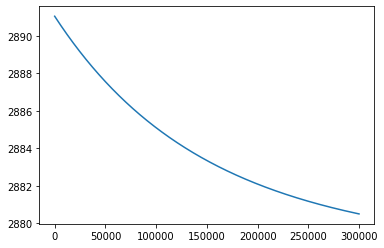

In [47]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [48]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, Y_test)
mse

2967.5835046122916

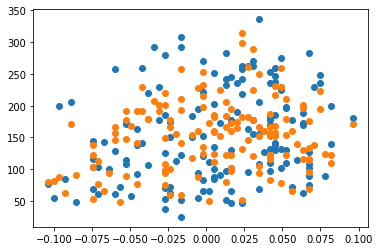

In [49]:
plt.scatter(X_test[:, 0], Y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()